# Hackathon on LTFS

In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DatetimeIndex
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,classification_report
from sklearn.utils import check_array
from sklearn import metrics

# import data 

In [216]:
test = pd.read_csv('./test_1eLl9Yf.csv')
train = pd.read_csv('./train_fwYjLYX.csv')
submission = pd.read_csv('./sample_submission_IIzFVsf.csv')

# head

In [217]:
train.head(3)

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0


In [218]:
test.head(3)

,id,application_date,segment
0,1,2019-07-06,1
1,2,2019-07-07,1
2,3,2019-07-08,1


In [219]:
submission.head(3)

,id,application_date,segment,case_count
0,1,2019-07-06,1,5
1,2,2019-07-07,1,5
2,3,2019-07-08,1,5


# Imbalance 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


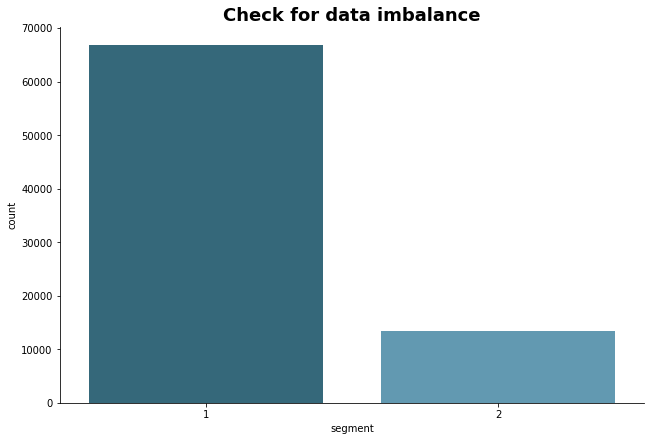

In [220]:
sns.factorplot(x="segment", data=train, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.title('Check for data imbalance', weight='bold').set_fontsize('18')
plt.show()

# Zone value_counts()

In [265]:
train.case_count.value_counts()

0.0        22207
1.0         1256
11.0        1151
10.0        1121
8.0         1097
9.0         1092
12.0        1082
13.0        1078
7.0         1063
14.0        1059
16.0        1019
6.0         1018
2.0         1015
17.0         991
4.0          987
15.0         975
3.0          965
5.0          963
18.0         936
19.0         935
20.0         851
21.0         832
22.0         819
23.0         741
24.0         738
27.0         656
26.0         653
28.0         641
29.0         638
25.0         636
           ...  
11241.0        1
10602.0        1
2320.0         1
2534.0         1
2291.0         1
3800.0         1
2396.0         1
6399.0         1
1886.0         1
1595.0         1
5589.0         1
3225.0         1
1851.0         1
3524.0         1
1311.0         1
2075.0         1
987.0          1
3085.0         1
1044.0         1
2030.0         1
9183.0         1
1295.0         1
2099.0         1
3776.0         1
1881.0         1
7665.0         1
2809.0         1
2164.0        

In [222]:
train.isnull().sum()


application_date        0
segment                 0
branch_id           13504
state                   0
zone                13504
case_count              0
dtype: int64

In [223]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null object
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                66898 non-null object
case_count          80402 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ MB


In [224]:
train_nn.branch_id.value_counts()

AttributeError: 'DataFrame' object has no attribute 'branch_id'

# are null values only in 
### zone=branch_id=segment(2)

In [225]:
te2t = train[train['segment']==2]

In [226]:
te2t.isnull().sum()

application_date        0
segment                 0
branch_id           13504
state                   0
zone                13504
case_count              0
dtype: int64

In [137]:
te2t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13504 entries, 66898 to 80401
Data columns (total 6 columns):
application_date    13504 non-null object
segment             13504 non-null int64
branch_id           0 non-null float64
state               13504 non-null object
zone                0 non-null object
case_count          13504 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 738.5+ KB


# Fill null with 0 

In [227]:
train_nn = train.fillna(0)

In [228]:
train_nn.isnull().sum()

application_date    0
segment             0
branch_id           0
state               0
zone                0
case_count          0
dtype: int64

# Date into year months and days 

In [229]:

for i in range(len(train_nn)): 
    train_nn.loc[i,'Day'] = int(train_nn.loc[i,'application_date'].split('-')[2])
    train_nn.loc[i,'month'] = int(train_nn.loc[i,'application_date'].split('-')[1])
    train_nn.loc[i,'year'] = int(train_nn.loc[i,'application_date'].split('-')[0])

In [230]:
train_nn.head()

,application_date,segment,branch_id,state,zone,case_count,Day,month,year
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,1.0,4.0,2017.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,3.0,4.0,2017.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,4.0,4.0,2017.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,5.0,4.0,2017.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,7.0,4.0,2017.0


In [231]:
train_nn.isnull().sum()

application_date    0
segment             0
branch_id           0
state               0
zone                0
case_count          0
Day                 0
month               0
year                0
dtype: int64

In [232]:
train_nn.application_date

0        2017-04-01
1        2017-04-03
2        2017-04-04
3        2017-04-05
4        2017-04-07
5        2017-04-12
6        2017-04-13
7        2017-04-14
8        2017-04-15
9        2017-04-16
10       2017-04-17
11       2017-04-18
12       2017-04-19
13       2017-04-20
14       2017-04-21
15       2017-04-22
16       2017-04-23
17       2017-04-24
18       2017-04-25
19       2017-04-26
20       2017-04-27
21       2017-04-28
22       2017-04-29
23       2017-04-30
24       2017-05-01
25       2017-05-02
26       2017-05-03
27       2017-05-04
28       2017-05-05
29       2017-05-07
            ...    
80372    2019-06-24
80373    2019-06-25
80374    2019-06-26
80375    2019-06-27
80376    2019-06-28
80377    2019-06-29
80378    2019-06-30
80379    2019-07-01
80380    2019-07-02
80381    2019-07-03
80382    2019-07-04
80383    2019-07-05
80384    2019-07-06
80385    2019-07-07
80386    2019-07-08
80387    2019-07-09
80388    2019-07-10
80389    2019-07-11
80390    2019-07-12


In [233]:
train_dummies  = pd.get_dummies(train_nn['state'], prefix = 'state')

In [236]:
train_nn = pd.concat([train_nn, train_dummies], axis=1)

In [238]:
train_dummies  = pd.get_dummies(train_nn['zone'], prefix = 'zone')

In [239]:
train_nn = pd.concat([train_nn, train_dummies], axis=1)

In [246]:
train_nn.drop(columns=['application_date'],inplace=True)

In [248]:
train_nn

,segment,branch_id,case_count,Day,month,year,state_ANDHRA PRADESH,state_ASSAM,state_BIHAR,state_CHHATTISGARH,...,state_TRIPURA,state_UTTAR PRADESH,state_UTTARAKHAND,state_WEST BENGAL,zone_0,zone_CENTRAL,zone_EAST,zone_NORTH,zone_SOUTH,zone_WEST
0,1,1.0,40.0,1.0,4.0,2017.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1,1.0,5.0,3.0,4.0,2017.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,1,1.0,4.0,4.0,4.0,2017.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,1.0,113.0,5.0,4.0,2017.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,1,1.0,76.0,7.0,4.0,2017.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
5,1,1.0,123.0,12.0,4.0,2017.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6,1,1.0,81.0,13.0,4.0,2017.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
7,1,1.0,117.0,14.0,4.0,2017.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8,1,1.0,127.0,15.0,4.0,2017.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
9,1,1.0,42.0,16.0,4.0,2017.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [255]:

X = train_nn.drop("case_count",1)
y = train_nn['case_count']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [291]:
lr = RandomForest()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr_accuracy = accuracy_score

In [287]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    print(np.mean(np.abs((y_true - y_pred) / y_true)) * 100)

In [288]:
mean_absolute_percentage_error(y_test, pre)

inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [293]:
(np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

inf

In [295]:
print(metrics.mean_absolute_error(y_test,y_pred))

233.78650907966855
